In [1]:
### import gc
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# 🚫 Suppressing warnings 🚫
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import cohen_kappa_score, make_scorer, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split

In [3]:
import os
from tqdm.auto import tqdm 
from concurrent.futures import ThreadPoolExecutor
from joblib import Parallel, delayed
from time import sleep, time
from multiprocessing import cpu_count
from sklearn.preprocessing import MinMaxScaler
import concurrent.futures

In [4]:
df = pd.read_csv('/kaggle/input/colombian-frenchteam-problematicinternetusage/Dataset_problematic_internet_usage.csv')
len(df)

3960

In [5]:
import glob
from pathlib import Path
import json

In [6]:
import json
import pandas as pd
import shutil
import os

# Define the input directories for the multiple parts
input_dirs = [
    '/kaggle/input/colombianfrenchteam-imagesv1/imagesandannotations/',
    '/kaggle/input/colombianfrenchteam-imagesv1-part2/imagesandannotations/',
    '/kaggle/input/colombianfrenchteam-imagesv1-part-3/imagesandannotations/',
    '/kaggle/input/colombianfrenchteam-imagesv1-part-4/imagesandannotations/',
    '/kaggle/input/colombianfrenchteam-imagesv1-part-5/imagesandannotations/',
    '/kaggle/input/colombianfrenchteam-imagesv1-part-6/imagesandannotations/'
]

# Define the destination folder for combined images
combined_images_dir = '/kaggle/working/combined_images/'

# Ensure the destination folder exists
os.makedirs(combined_images_dir, exist_ok=True)

# Function to load and fix the JSON files if needed
def load_json_file(file_path):
    try:
        with open(file_path, 'r') as file:
            content = file.read()

        # Fix invalid '][' and wrap content in square brackets if necessary
        fixed_content = content.replace("][", ",")
        if not fixed_content.startswith('['):
            fixed_content = f"[{fixed_content}"
        if not fixed_content.endswith(']'):
            fixed_content = f"{fixed_content}]"
        
        data = json.loads(fixed_content)
        print(f"Successfully loaded {file_path}!")
        return data
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON in {file_path}: {e}")
        return None

# Function to copy all files from source to destination
def copy_images(source_dir):
    for filename in os.listdir(source_dir):
        file_path = os.path.join(source_dir, filename)
        if os.path.isfile(file_path):
            shutil.copy(file_path, combined_images_dir)

# Data containers for all parts
all_window_properties_data = []
all_all_events_data = []

# Load data and copy images for each input directory part
for input_dir in input_dirs:
    # Define the paths to the JSON files for this part
    window_properties_path = os.path.join(input_dir, 'window_properties.json')
    all_events_path = os.path.join(input_dir, 'all_events.json')

    # Load the JSON data
    window_properties_data = load_json_file(window_properties_path)
    all_events_data = load_json_file(all_events_path)

    # Append the data from this part
    if window_properties_data:
        all_window_properties_data.extend(window_properties_data)
    if all_events_data:
        all_all_events_data.extend(all_events_data)

    # Copy images for this part
    copy_images(input_dir)

# Convert all collected window properties and events data into DataFrames
window_properties_df = pd.DataFrame(all_window_properties_data)
all_events_df = pd.DataFrame(all_all_events_data)

# Display a sample of the DataFrames
print("Window Properties DataFrame:")
print(window_properties_df.head())  # Show the first 5 rows as a sample

print("\nAll Events DataFrame:")
print(all_events_df.head())  # Show the first 5 rows as a sample

print(f"All images have been successfully copied to {combined_images_dir}")

Successfully loaded /kaggle/input/colombianfrenchteam-imagesv1/imagesandannotations/window_properties.json!
Successfully loaded /kaggle/input/colombianfrenchteam-imagesv1/imagesandannotations/all_events.json!
Successfully loaded /kaggle/input/colombianfrenchteam-imagesv1-part2/imagesandannotations/window_properties.json!
Successfully loaded /kaggle/input/colombianfrenchteam-imagesv1-part2/imagesandannotations/all_events.json!
Successfully loaded /kaggle/input/colombianfrenchteam-imagesv1-part-3/imagesandannotations/window_properties.json!
Successfully loaded /kaggle/input/colombianfrenchteam-imagesv1-part-3/imagesandannotations/all_events.json!
Successfully loaded /kaggle/input/colombianfrenchteam-imagesv1-part-4/imagesandannotations/window_properties.json!
Successfully loaded /kaggle/input/colombianfrenchteam-imagesv1-part-4/imagesandannotations/all_events.json!
Successfully loaded /kaggle/input/colombianfrenchteam-imagesv1-part-5/imagesandannotations/window_properties.json!
Successfu

In [7]:
# Path to the directory
directory_path = '/kaggle/working/combined_images/'

# List all files in the directory and filter out the .jpg files
jpg_files = [f for f in os.listdir(directory_path) if f.lower().endswith('.jpg')]

# Count the number of .jpg files
num_jpg_files = len(jpg_files)

# Print the result
print(f"Number of .jpg images: {num_jpg_files}")

Number of .jpg images: 9434


In [8]:
combined_df = all_events_df
combined_df = combined_df.rename(columns={'series_id': 'id'})
len(combined_df.id.unique())

617

In [9]:
combined_df

,id,image_name,label
0,2da6bf6e,2da6bf6e_2.jpg,0.0
1,2da6bf6e,2da6bf6e_3.jpg,0.0
2,2da6bf6e,2da6bf6e_4.jpg,0.0
3,2da6bf6e,2da6bf6e_5.jpg,0.0
4,2da6bf6e,2da6bf6e_6.jpg,0.0
...,...,...,...
9429,ffed1dd5,ffed1dd5_9.jpg,0.0
9430,ffed1dd5,ffed1dd5_10.jpg,0.0
9431,ffed1dd5,ffed1dd5_11.jpg,0.0
9432,ffed1dd5,ffed1dd5_13.jpg,0.0


In [10]:
len(combined_df)

9434

In [11]:
combined_df.dtypes

id            object
image_name    object
label         object
dtype: object

In [12]:
# Group by 'sii' and count occurrences, including NaN as a category
sii_counts = combined_df['label'].value_counts(dropna=False)

# Calculate percentages
sii_percentages = (sii_counts / sii_counts.sum()) * 100

# Create a DataFrame to display counts and percentages together
sii_summary = pd.DataFrame({
    'Count': sii_counts,
    'Percentage': sii_percentages
})

# Display the summary
print(sii_summary)

       Count  Percentage
label                   
0.0     5534   58.660165
1.0     2588   27.432690
2.0     1258   13.334747
3.0       54    0.572398


In [13]:
combined_df.head(5)

,id,image_name,label
0,2da6bf6e,2da6bf6e_2.jpg,0.0
1,2da6bf6e,2da6bf6e_3.jpg,0.0
2,2da6bf6e,2da6bf6e_4.jpg,0.0
3,2da6bf6e,2da6bf6e_5.jpg,0.0
4,2da6bf6e,2da6bf6e_6.jpg,0.0


In [14]:
combined_df['sii'] = pd.to_numeric(combined_df['label'], errors='coerce')
combined_df['sii'] = combined_df['sii'].astype(int)

In [15]:
combined_df.head(5)

,id,image_name,label,sii
0,2da6bf6e,2da6bf6e_2.jpg,0.0,0
1,2da6bf6e,2da6bf6e_3.jpg,0.0,0
2,2da6bf6e,2da6bf6e_4.jpg,0.0,0
3,2da6bf6e,2da6bf6e_5.jpg,0.0,0
4,2da6bf6e,2da6bf6e_6.jpg,0.0,0


# Visualize the images


Image: 25849c6c_9.jpg
Dimensions: 2160x600


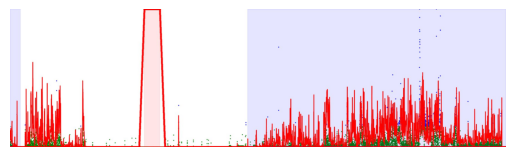

In [16]:
import random
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

# Assuming combined_df is already loaded
# Load a random row from the dataframe
random_row = combined_df.sample(n=1).iloc[0]

# Get the image file name from the 'image_name' column
image_name = random_row['image_name']

# Construct the full path to the image
image_path = f'/kaggle/working/combined_images/{image_name}'

# Open the image
image = Image.open(image_path)

# Get the dimensions of the image
image_width, image_height = image.size

# Print the image name and dimensions
print(f"Image: {image_name}")
print(f"Dimensions: {image_width}x{image_height}")

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes for a cleaner view
plt.show()

Original Image: f11e17c0_14.jpg
Original Dimensions: 2160x600
Resized Dimensions: 600x166


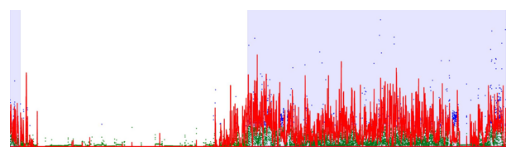

In [17]:
# Assuming combined_df is already loaded
# Load a random row from the dataframe
random_row = combined_df.sample(n=1).iloc[0]

# Get the image file name from the 'image_name' column
image_name = random_row['image_name']

# Construct the full path to the image
image_path = f'/kaggle/working/combined_images/{image_name}'

# Open the image
image = Image.open(image_path)

# Get the original dimensions of the image
image_width, image_height = image.size

# Print the original image name and dimensions
print(f"Original Image: {image_name}")
print(f"Original Dimensions: {image_width}x{image_height}")

# Resize the image while keeping the aspect ratio (resize width to 600px)
target_width = 600
aspect_ratio = image_height / image_width
target_height = int(target_width * aspect_ratio)

# Resize the image
resized_image = image.resize((target_width, target_height))

# Print the resized image dimensions
print(f"Resized Dimensions: {resized_image.size[0]}x{resized_image.size[1]}")

# Display the resized image
plt.imshow(resized_image)
plt.axis('off')  # Hide axes for a cleaner view
plt.show()

In [18]:
# Desired image dimensions
target_width = 2160
target_height = 600

# Directory containing the images
image_dir = '/kaggle/working/combined_images/'

# Iterate through each image in the directory
for image_name in os.listdir(image_dir):
    image_path = os.path.join(image_dir, image_name)
    
    # Check if it's an image file (you can add more image formats if necessary)
    if image_name.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
        # Open the image
        image = Image.open(image_path)
        
        # Get the current dimensions of the image
        image_width, image_height = image.size
        
        # Check if the dimensions match the target size
        if image_width != target_width or image_height != target_height:
            print(f"Image {image_name} has dimensions {image_width}x{image_height}, "
                  f"but the expected dimensions are {target_width}x{target_height}.")

In [19]:
# Group by 'sii' and count occurrences, including NaN as a category
sii_counts = combined_df['label'].value_counts(dropna=False)

# Calculate percentages
sii_percentages = (sii_counts / sii_counts.sum()) * 100

# Create a DataFrame to display counts and percentages together
sii_summary = pd.DataFrame({
    'Count': sii_counts,
    'Percentage': sii_percentages
})

# Display the summary
print(sii_summary)

       Count  Percentage
label                   
0.0     5534   58.660165
1.0     2588   27.432690
2.0     1258   13.334747
3.0       54    0.572398


# CNN Vanilla

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score
from PIL import Image
import numpy as np
import pandas as pd
import os
from torchvision import transforms

# Path to the image folder
image_dir = '/kaggle/working/combined_images/'

# Load the combined_df DataFrame (assuming it's already loaded)
# combined_df = pd.read_csv('your_dataframe.csv')  # Replace with your actual DataFrame loading

# Custom Dataset class to load images from the dataframe
class ImageDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_dir, self.dataframe.iloc[idx, 1])  # image_name column
        image = Image.open(img_name)
        label = self.dataframe.iloc[idx, 3]  # sii column
        image_id = self.dataframe.iloc[idx, 0]  # id column (assuming the 'id' is in the first column)

        if self.transform:
            image = self.transform(image)

        return image, label, image_id  # Return the image, label, and id

# Function to calculate the target height maintaining the aspect ratio
def calculate_target_height(image, target_width):
    width, height = image.size
    target_height = int((target_width * height) / width)
    return target_height

# Define the CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = None  # We will initialize this dynamically
        self.fc2 = nn.Linear(512, NUM_CLASSES)  # Assuming this part will remain constant
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Calculate the output size after conv1, conv2, conv3 and pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        # Dynamically calculate the flattened size
        flattened_size = x.size(1) * x.size(2) * x.size(3)
        x = x.view(-1, flattened_size)  # Flatten the tensor dynamically

        if self.fc1 is None:
            self.fc1 = nn.Linear(flattened_size, 512)  # Initialize fc1 dynamically based on the size
            self.fc1.apply(self.init_weights)  # Optionally initialize weights

        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x
    
    # Initialize weights for the dynamically created fc1 layer
    def init_weights(self, m):
        if isinstance(m, nn.Linear):
            nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)

# Transforms for resizing while maintaining the aspect ratio and data normalization
def get_transform():
    def transform(image):
        target_height = calculate_target_height(image, TARGET_WIDTH)  # Calculate target height
        resize_transform = transforms.Resize((target_height, TARGET_WIDTH))  # Resize to maintain aspect ratio
        image = resize_transform(image)
        image = transforms.ToTensor()(image)
        image = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])(image)
        return image
    return transform

In [21]:
torch.cuda.is_available()

False

In [22]:
# Group by 'sii' and count occurrences, including NaN as a category
sii_counts = combined_df['label'].value_counts(dropna=False)

# Calculate percentages
sii_percentages = (sii_counts / sii_counts.sum()) * 100

# Count the unique 'id's for each 'sii' value
sii_unique_ids_count = combined_df.groupby('label')['id'].nunique()

# Create a DataFrame to display counts, percentages, and unique id count together
sii_summary = pd.DataFrame({
    'Count': sii_counts,
    'Percentage': sii_percentages,
    'Unique ID Count': sii_unique_ids_count
})

# Display the summary
print(sii_summary)

       Count  Percentage  Unique ID Count
label                                    
0.0     5534   58.660165              350
1.0     2588   27.432690              171
2.0     1258   13.334747               90
3.0       54    0.572398                6


In [23]:
# Determine if CUDA is available and set the device accordingly
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  # Use GPU 0
print(f"Using device: {device}")

Using device: cpu


In [24]:
from sklearn.utils.class_weight import compute_class_weight
import torch

# Calculate class weights based on the label distribution
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(combined_df['label']),
    y=combined_df['label']
)

# Convert class weights to a tensor and move it to the same device (GPU or CPU)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)

class_weights_tensor

tensor([ 0.4262,  0.9113,  1.8748, 43.6759])

In [25]:
# Define constants
TARGET_WIDTH = 224  # Resize to 600px width while keeping the aspect ratio for height
NUM_CLASSES = 4  # SII values: 0, 1, 2, 3
BATCH_SIZE = 32  # Depending on available memory, you can adjust this
NUM_EPOCHS = 10 # just to quickly test
LEARNING_RATE = 0.0001

In [26]:
from collections import defaultdict
from sklearn.metrics import confusion_matrix, cohen_kappa_score
import numpy as np
from sklearn.model_selection import StratifiedKFold

# Arrays to store results for each case
kappa_scores_image_level = []
kappa_scores_id_level_no_argmax = []
kappa_scores_id_level_custom_logic = []

all_true_labels_image = []
all_pred_labels_image = []

all_true_labels_id_no_argmax = []
all_pred_labels_id_no_argmax = []

all_true_labels_id_custom = []
all_pred_labels_id_custom = []

matrices_image_level = []
matrices_id_no_argmax = []
matrices_id_custom_logic = []

# First, split the data based on the unique IDs
ids = combined_df['id'].unique()
n_splits = 5  # Number of CV splits
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# For each fold in cross-validation
for fold, (train_idx, val_idx) in enumerate(kf.split(ids, combined_df.groupby('id')['label'].first().loc[ids])):
    print(f"Training fold {fold + 1}/{n_splits}...")

    # Get the corresponding data for training and validation based on the split IDs
    train_ids = ids[train_idx]
    val_ids = ids[val_idx]
    train_df = combined_df[combined_df['id'].isin(train_ids)]
    val_df = combined_df[combined_df['id'].isin(val_ids)]

    # Prepare datasets for this fold
    train_dataset = ImageDataset(train_df, image_dir, transform=get_transform())
    val_dataset = ImageDataset(val_df, image_dir, transform=get_transform())

    # Create DataLoader for training and validation
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

    # Initialize the model, loss function, and optimizer
    model = SimpleCNN().to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    # Train the model for the specified number of epochs
    for epoch in range(NUM_EPOCHS):
        model.train()
        running_loss = 0.0
        for inputs, labels, img_ids in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch {epoch + 1}/{NUM_EPOCHS}, Loss: {running_loss / len(train_loader):.4f}")

    # Evaluate the model on the validation set
    model.eval()

    # Dictionaries to hold true and predicted labels for each ID
    id_true_labels_no_argmax = defaultdict(list)
    id_pred_labels_no_argmax = defaultdict(list)
    
    id_true_labels_custom = defaultdict(list)
    id_pred_labels_custom = defaultdict(list)

    # For image-level confusion matrix
    true_labels_image = []
    pred_labels_image = []

    with torch.no_grad():
        for batch_idx, (inputs, labels, image_ids) in enumerate(val_loader):  # We now also get 'ids'
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
    
            # For image-level confusion matrix and Kappa
            true_labels_image.extend(labels.cpu().numpy())
            pred_labels_image.extend(predicted.cpu().numpy())
    
            # For collecting labels by ID for both strategies
            for i in range(len(image_ids)):  # Iterate over each image in the batch
                image_id = image_ids[i]  # Use the image_id from the batch
    
                # For No `argmax` ID-level confusion matrix: Collect labels
                id_true_labels_no_argmax[image_id].append(labels[i].cpu().numpy())
                id_pred_labels_no_argmax[image_id].append(predicted[i].cpu().numpy())
    
                # For Custom Logic ID-level confusion matrix: Collect labels
                id_true_labels_custom[image_id].append(labels[i].cpu().numpy())
                id_pred_labels_custom[image_id].append(predicted[i].cpu().numpy())

    # Calculate Kappa for Image-level
    kappa_image = cohen_kappa_score(true_labels_image, pred_labels_image, weights='quadratic')
    kappa_scores_image_level.append(kappa_image)

    # Calculate Kappa for ID-level (No `argmax`)
    id_true_labels_aggregated_no_argmax = []
    id_pred_labels_aggregated_no_argmax = []
    for image_id in id_true_labels_no_argmax:
        # Most frequent label for each ID
        most_frequent_true_label = np.bincount(id_true_labels_no_argmax[image_id]).argmax()
        most_frequent_pred_label = np.bincount(id_pred_labels_no_argmax[image_id]).argmax()

        id_true_labels_aggregated_no_argmax.append(most_frequent_true_label)
        id_pred_labels_aggregated_no_argmax.append(most_frequent_pred_label)

    kappa_no_argmax = cohen_kappa_score(id_true_labels_aggregated_no_argmax, id_pred_labels_aggregated_no_argmax, weights='quadratic')
    kappa_scores_id_level_no_argmax.append(kappa_no_argmax)

    # Calculate Kappa for ID-level (Custom Logic)
    # After collecting true and predicted labels per ID, we apply custom logic
    id_true_labels_custom_aggregated = []
    id_pred_labels_custom_aggregated = []
    
    for image_id in id_true_labels_custom:
        true_labels = id_true_labels_custom[image_id]
        pred_labels = id_pred_labels_custom[image_id]
    
        # Apply custom logic:
        # Priority: if the ID has at least one image labeled as 3.0, then it is 3.0, and so on
        if 3 in pred_labels:
            pred_label = 3
        elif 2 in pred_labels:
            pred_label = 2
        elif 1 in pred_labels:
            pred_label = 1
        else:
            pred_label = 0
    
        if 3 in true_labels:
            true_label = 3
        elif 2 in true_labels:
            true_label = 2
        elif 1 in true_labels:
            true_label = 1
        else:
            true_label = 0
    
        id_true_labels_custom_aggregated.append(true_label)
        id_pred_labels_custom_aggregated.append(pred_label)

    kappa_custom_logic = cohen_kappa_score(id_true_labels_custom_aggregated, id_pred_labels_custom_aggregated, weights='quadratic')
    kappa_scores_id_level_custom_logic.append(kappa_custom_logic)

    print(f"Fold {fold + 1} Image-level Kappa: {kappa_image:.4f}")
    print(f"Fold {fold + 1} ID-level No `argmax` Kappa: {kappa_no_argmax:.4f}")
    print(f"Fold {fold + 1} ID-level Custom Logic Kappa: {kappa_custom_logic:.4f}")

    # Calculate confusion matrix for each case (Image-level, ID-level No `argmax`, ID-level Custom Logic)
    cm_image_level = confusion_matrix(true_labels_image, pred_labels_image)
    cm_id_no_argmax = confusion_matrix(id_true_labels_aggregated_no_argmax, id_pred_labels_aggregated_no_argmax)
    cm_id_custom_logic = confusion_matrix(id_true_labels_custom_aggregated, id_pred_labels_custom_aggregated)

    matrices_image_level.append(cm_image_level)
    matrices_id_no_argmax.append(cm_id_no_argmax)
    matrices_id_custom_logic.append(cm_id_custom_logic)

# Calculate the average Kappa scores for all folds
average_kappa_image = np.mean(kappa_scores_image_level)
average_kappa_no_argmax = np.mean(kappa_scores_id_level_no_argmax)
average_kappa_custom_logic = np.mean(kappa_scores_id_level_custom_logic)

print(f"\nAverage Image-level Kappa: {average_kappa_image:.4f}")
print(f"Average ID-level No `argmax` Kappa: {average_kappa_no_argmax:.4f}")
print(f"Average ID-level Custom Logic Kappa: {average_kappa_custom_logic:.4f}")

total_image_level = np.sum(matrices_image_level, axis=0).astype(int)
total_id_no_argmax = np.sum(matrices_id_no_argmax, axis=0).astype(int)
total_id_custom_logic = np.sum(matrices_id_custom_logic, axis=0).astype(int)

# Display confusion matrices
print("\nConfusion Matrix (Image-level):")
print(total_image_level)
print("\nConfusion Matrix (ID-level No `argmax`):")
print(total_id_no_argmax)
print("\nConfusion Matrix (ID-level Custom Logic):")
print(total_id_custom_logic)

Training fold 1/5...
Epoch 1/10, Loss: 1.3560
Epoch 2/10, Loss: 1.2775
Epoch 3/10, Loss: 1.2846
Epoch 4/10, Loss: 1.2464
Epoch 5/10, Loss: 1.2315
Epoch 6/10, Loss: 1.2113
Epoch 7/10, Loss: 1.1899
Epoch 8/10, Loss: 1.1845
Epoch 9/10, Loss: 1.1567
Epoch 10/10, Loss: 1.1501
Fold 1 Image-level Kappa: 0.1768
Fold 1 ID-level No `argmax` Kappa: 0.3327
Fold 1 ID-level Custom Logic Kappa: 0.0776
Training fold 2/5...
Epoch 1/10, Loss: 1.3853
Epoch 2/10, Loss: 1.3118
Epoch 3/10, Loss: 1.2980
Epoch 4/10, Loss: 1.2834
Epoch 5/10, Loss: 1.2684
Epoch 6/10, Loss: 1.2530
Epoch 7/10, Loss: 1.2214
Epoch 8/10, Loss: 1.2060
Epoch 9/10, Loss: 1.1971
Epoch 10/10, Loss: 1.1873
Fold 2 Image-level Kappa: 0.1618
Fold 2 ID-level No `argmax` Kappa: 0.2395
Fold 2 ID-level Custom Logic Kappa: 0.0390
Training fold 3/5...
Epoch 1/10, Loss: 1.3599
Epoch 2/10, Loss: 1.3028
Epoch 3/10, Loss: 1.2733
Epoch 4/10, Loss: 1.2821
Epoch 5/10, Loss: 1.2354
Epoch 6/10, Loss: 1.2363
Epoch 7/10, Loss: 1.2117
Epoch 8/10, Loss: 1.2082

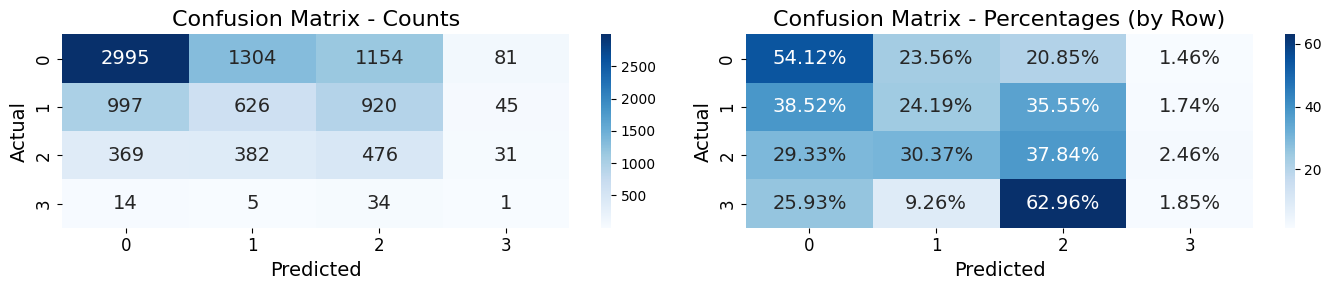

In [27]:
total_confusion_matrix = total_image_level

# Calculate the percentage confusion matrix by row
row_sums = np.sum(total_confusion_matrix, axis=1, keepdims=True)  # Sum of each row
percentage_confusion_matrix_by_row = total_confusion_matrix / row_sums * 100  # Normalize by row

# Manually format the percentages by adding '%' to each label
formatted_percentage_matrix = np.array([['{:.2f}%'.format(val) for val in row] for row in percentage_confusion_matrix_by_row])

# Create a figure with two subplots: one for the counts and one for percentages
fig, axes = plt.subplots(1, 2, figsize=(14, 3))

# Plot the confusion matrix with counts
sns.heatmap(total_confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3], ax=axes[0], annot_kws={"size": 14})
axes[0].set_title("Confusion Matrix - Counts", fontsize=16)
axes[0].set_xlabel("Predicted", fontsize=14)
axes[0].set_ylabel("Actual", fontsize=14)

# Increase font size for ticks
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Plot the confusion matrix with formatted percentages by row
sns.heatmap(percentage_confusion_matrix_by_row, annot=formatted_percentage_matrix, fmt="s", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3], ax=axes[1], annot_kws={"size": 14})
axes[1].set_title("Confusion Matrix - Percentages (by Row)", fontsize=16)
axes[1].set_xlabel("Predicted", fontsize=14)
axes[1].set_ylabel("Actual", fontsize=14)

# Increase font size for ticks
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

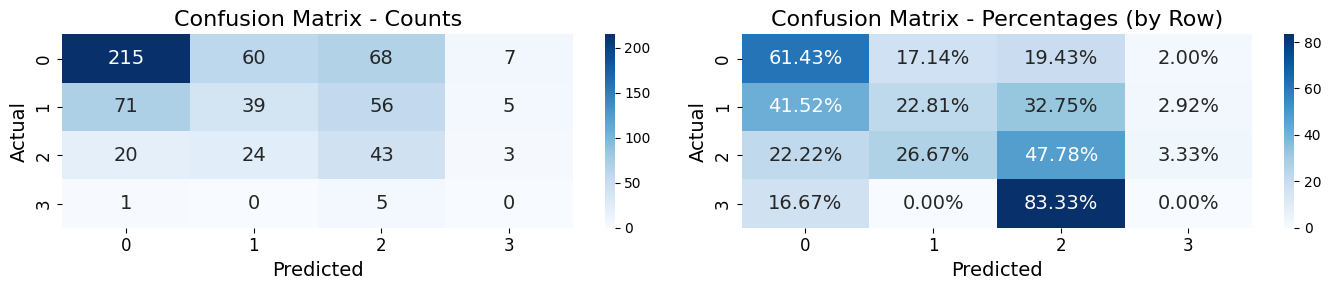

In [28]:
total_confusion_matrix = total_id_no_argmax

# Calculate the percentage confusion matrix by row
row_sums = np.sum(total_confusion_matrix, axis=1, keepdims=True)  # Sum of each row
percentage_confusion_matrix_by_row = total_confusion_matrix / row_sums * 100  # Normalize by row

# Manually format the percentages by adding '%' to each label
formatted_percentage_matrix = np.array([['{:.2f}%'.format(val) for val in row] for row in percentage_confusion_matrix_by_row])

# Create a figure with two subplots: one for the counts and one for percentages
fig, axes = plt.subplots(1, 2, figsize=(14, 3))

# Plot the confusion matrix with counts
sns.heatmap(total_confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3], ax=axes[0], annot_kws={"size": 14})
axes[0].set_title("Confusion Matrix - Counts", fontsize=16)
axes[0].set_xlabel("Predicted", fontsize=14)
axes[0].set_ylabel("Actual", fontsize=14)

# Increase font size for ticks
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Plot the confusion matrix with formatted percentages by row
sns.heatmap(percentage_confusion_matrix_by_row, annot=formatted_percentage_matrix, fmt="s", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3], ax=axes[1], annot_kws={"size": 14})
axes[1].set_title("Confusion Matrix - Percentages (by Row)", fontsize=16)
axes[1].set_xlabel("Predicted", fontsize=14)
axes[1].set_ylabel("Actual", fontsize=14)

# Increase font size for ticks
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

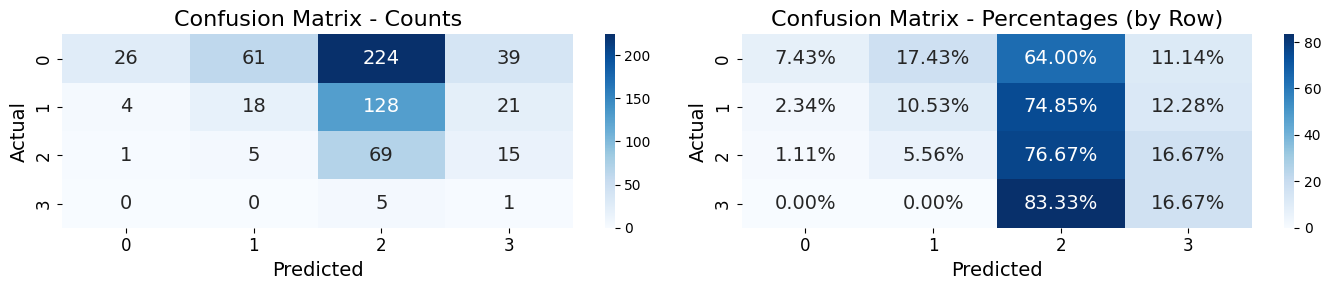

In [29]:
total_confusion_matrix = total_id_custom_logic

# Calculate the percentage confusion matrix by row
row_sums = np.sum(total_confusion_matrix, axis=1, keepdims=True)  # Sum of each row
percentage_confusion_matrix_by_row = total_confusion_matrix / row_sums * 100  # Normalize by row

# Manually format the percentages by adding '%' to each label
formatted_percentage_matrix = np.array([['{:.2f}%'.format(val) for val in row] for row in percentage_confusion_matrix_by_row])

# Create a figure with two subplots: one for the counts and one for percentages
fig, axes = plt.subplots(1, 2, figsize=(14, 3))

# Plot the confusion matrix with counts
sns.heatmap(total_confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3], ax=axes[0], annot_kws={"size": 14})
axes[0].set_title("Confusion Matrix - Counts", fontsize=16)
axes[0].set_xlabel("Predicted", fontsize=14)
axes[0].set_ylabel("Actual", fontsize=14)

# Increase font size for ticks
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Plot the confusion matrix with formatted percentages by row
sns.heatmap(percentage_confusion_matrix_by_row, annot=formatted_percentage_matrix, fmt="s", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3], ax=axes[1], annot_kws={"size": 14})
axes[1].set_title("Confusion Matrix - Percentages (by Row)", fontsize=16)
axes[1].set_xlabel("Predicted", fontsize=14)
axes[1].set_ylabel("Actual", fontsize=14)

# Increase font size for ticks
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()